In [1]:
# загрузим библиотеки
# данные библиотеки являются стандартными для пакета Anaconda
import pandas as pd
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import *
from matplotlib import pyplot as plt
from matplotlib import rc
import numpy as np
from sklearn.cluster import KMeans
#данная строчка нужна для корректного отображения графиков
%matplotlib inline

In [5]:
df=pd.read_excel('data_shop.xlsx', sheets='Sheet1') #!!!!!! измените имя файла и название рабочего листа
df.sample(2) #эта команда выведет пять случайных строк таблицы, таблица не отобразиться полностью.

,id,Review,Star,Value,brandId,brandName,goodsName,isSoldOut,link,lowQuantity,...,Длина кабеля,Количество температурных режимов,Материал корпуса,Модель,Мощность устройства,Объем чайника,Страна бренда,Страна производитель,Цвет,sale_june
48,3653532,43,4,4490,16102,Kitfort,Чайник КТ-601,0,https://www.wildberries.ru/catalog/3653532/det...,0,...,70.0,4,металл; стекло,КТ-601,2500.0,1.7,Россия,Китай,"серебристый, прозрачный",0
387,8878173,7,2,917,17273,Mercury,"Чайник электрический 2,0 л.",0,https://www.wildberries.ru/catalog/8878173/det...,0,...,100.0,1,NaN,00-00000512,2000.0,2.0,Китай,Китай,серебристый,0


In [7]:
df.info() # информация о столбцах таблицы и типах меременных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                642 non-null    int64  
 1   Review                            642 non-null    int64  
 2   Star                              642 non-null    int64  
 3   Value                             642 non-null    int64  
 4   brandId                           642 non-null    int64  
 5   brandName                         642 non-null    object 
 6   goodsName                         642 non-null    object 
 7   isSoldOut                         642 non-null    int64  
 8   link                              642 non-null    object 
 9   lowQuantity                       642 non-null    int64  
 10  ordersCount                       642 non-null    int64  
 11  price                             642 non-null    int64  
 12  qualityR

In [11]:
df.describe() # статистики по столбцам с количественными переменными

,id,Review,Star,Value,brandId,isSoldOut,lowQuantity,ordersCount,price,qualityRate,Вес с упаковкой (кг),Длина кабеля,Мощность устройства,Объем чайника,sale_june
count,6.420000e+02,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,637.000000,625.000000,634.000000,641.000000,642.000000
mean,7.835927e+06,32.908100,3.819315,2210.987539,25560.778816,0.004673,0.073209,280.514019,2783.130841,97.364486,1.363077,72.977920,1994.779180,1.668019,14.725857
std,2.499043e+06,64.158267,0.960240,1451.388317,13756.815222,0.068252,0.260682,712.203553,1831.338995,8.153051,0.665768,77.105167,391.228811,0.339104,40.779031
min,2.171393e+06,0.000000,0.000000,0.000000,599.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.180000,0.600000,500.000000,0.500000,0.000000
25%,5.824747e+06,5.000000,3.000000,1205.250000,16102.000000,0.000000,0.000000,40.000000,1547.750000,97.000000,1.050000,63.000000,1800.000000,1.700000,0.000000
50%,8.123429e+06,11.000000,4.000000,1802.000000,20577.000000,0.000000,0.000000,90.000000,2254.500000,100.000000,1.300000,70.000000,2200.000000,1.700000,0.000000
75%,1.002333e+07,31.000000,4.000000,2788.750000,34103.000000,0.000000,0.000000,200.000000,3490.000000,100.000000,1.500000,75.000000,2200.000000,1.800000,10.000000
max,1.239497e+07,535.000000,5.000000,11790.000000,72224.000000,1.000000,1.000000,10300.000000,11790.000000,100.000000,11.400000,1000.000000,3000.000000,5.000000,400.000000


In [12]:
df.columns #ниже выводит список столцов, удобно для копирования

Index(['id', 'Review', 'Star', 'Value', 'brandId', 'brandName', 'goodsName',
       'isSoldOut', 'link', 'lowQuantity', 'ordersCount', 'price',
       'qualityRate', 'Вес с упаковкой (кг)', 'Длина кабеля',
       'Количество температурных режимов', 'Материал корпуса', 'Модель',
       'Мощность устройства', 'Объем чайника', 'Страна бренда',
       'Страна производитель', 'Цвет', 'sale_june'],
      dtype='object')

In [14]:
col=['Review', 'Star', 'ordersCount'] # !!!!!! укажите количественные (int, float) столбцы, 
#                                       по которым выполним кластеризацию

In [16]:
pd.options.mode.chained_assignment = None 
df[col].fillna(0, inplace=True) # заменим пропуски данных нулями, в противном случае выдаст ошибку

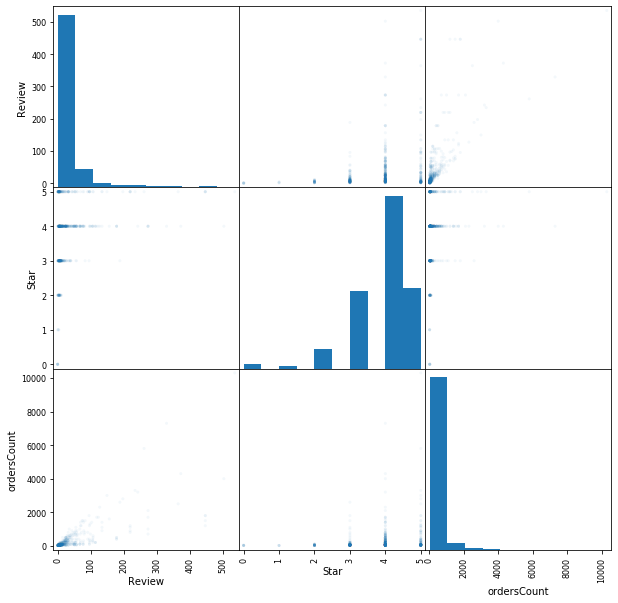

In [17]:
# матрица рассеяния и гистограммы
from pandas.plotting import scatter_matrix
scatter_matrix(df[col], alpha=0.05, figsize=(10, 10));

In [19]:
df[col].corr() # посмотрим на парные корреляции

,Review,Star,ordersCount
Review,1.000000,0.226545,0.765877
Star,0.226545,1.000000,0.160890
ordersCount,0.765877,0.160890,1.000000


In [22]:
# загружаем библиотеку препроцесинга данных
# эта библиотека автоматически приведен данные к нормальным значениям
from sklearn import preprocessing
dataNorm = preprocessing.MinMaxScaler().fit_transform(df[col].values)

In [24]:
# Вычислим расстояния между каждым набором данных,
# т.е. строками массива data_for_clust
# Вычисляется евклидово расстояние (по умолчанию)
data_dist = pdist(dataNorm, 'euclidean')
# Главная функция иерархической кластеризии
# Объедение элементов в кластера и сохранение в 
# специальной переменной (используется ниже для визуализации 
# и выделения количества кластеров
data_linkage = linkage(data_dist, method='average')

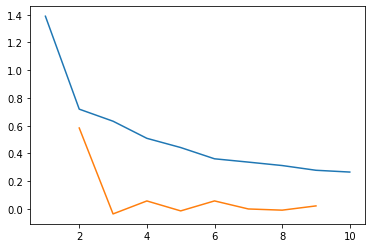

Рекомендованное количество кластеров: 2


In [25]:
# Метод локтя. Позволячет оценить оптимальное количество сегментов.
# Показывает сумму внутри групповых вариаций
last = data_linkage[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2 
print("Рекомендованное количество кластеров:", k)

In [27]:
#функция построения дендрограмм
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

In [28]:
# !!!!!!!!! укажите, какое количество кластеров будете использовать!
nClust=6

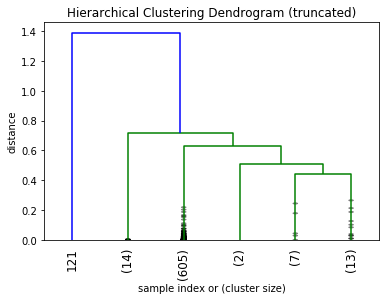

In [30]:
#строим дендрограмму 
fancy_dendrogram(
    data_linkage,
    truncate_mode='lastp',
    p=nClust, 
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
)
plt.show()

In [31]:
# иерархическая кластеризация
clusters=fcluster(data_linkage, nClust, criterion='maxclust')
clusters

array([2, 2, 5, 5, 5, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 5, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [32]:
col

['Review', 'Star', 'ordersCount']

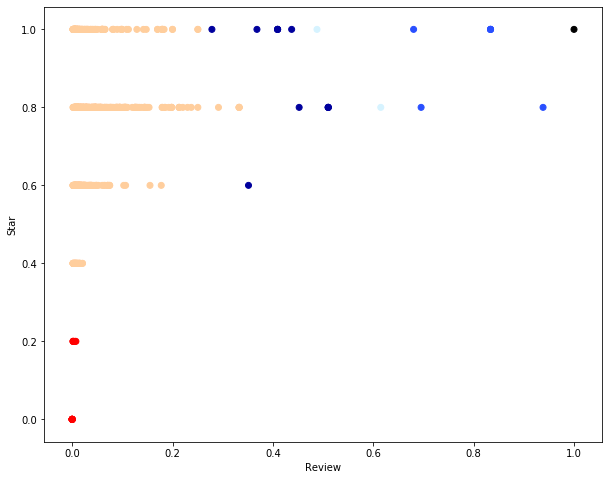

In [33]:
x=0 # Чтобы построить диаграмму в разных осях, меняйте номера столбцов
y=1 #
plt.figure(figsize=(10, 8))
plt.scatter(dataNorm[:,x], dataNorm[:,y], c=clusters, cmap='flag')
plt.xlabel(col[x])
plt.ylabel(col[y]);
plt.show()

In [34]:
# к оригинальным данным добавляем номер кластера
df['I']=clusters
res=df.groupby('I')[col].mean()
res['Количество']=df.groupby('I').size().values
res #ниже средние цифры по кластерам и количество объектов (Количество)

,Review,Star,ordersCount,Количество
I,,,,
1,0.714286,0.357143,23.571429,14
2,23.127273,3.871074,189.851240,605
3,295.000000,4.500000,6550.000000,2
4,431.714286,4.714286,2442.857143,7
5,229.076923,4.461538,1876.923077,13
6,535.000000,5.000000,10300.000000,1


In [35]:
df[df['I']==4] # !!!!! меняйте номер кластера

,id,Review,Star,Value,brandId,brandName,goodsName,isSoldOut,link,lowQuantity,...,Количество температурных режимов,Материал корпуса,Модель,Мощность устройства,Объем чайника,Страна бренда,Страна производитель,Цвет,sale_june,I
98,4951672,446,5,1205,25258,GALAXY,Чайник электрический GL0318,0,https://www.wildberries.ru/catalog/4951672/det...,0,...,1,металл и пластик,GL0318,2000.0,1.7,Россия,Китай,"белый, серый",0,4
99,4951673,446,5,1205,25258,GALAXY,Чайник электрический GL0318,0,https://www.wildberries.ru/catalog/4951673/det...,0,...,1,металл и пластик,GL0318,2000.0,1.7,Россия,Китай,"салатовый, серый",0,4
100,4951674,446,5,1205,25258,GALAXY,Чайник электрический GL0318,0,https://www.wildberries.ru/catalog/4951674/det...,0,...,1,металл и пластик,GL0318,2000.0,1.7,Россия,Китай,"коричневый, серый",0,4
101,4951675,446,5,1205,25258,GALAXY,Чайник электрический GL0318,0,https://www.wildberries.ru/catalog/4951675/det...,0,...,1,металл и пластик,GL0318,2000.0,1.7,Россия,Китай,"красный, серый",0,4
164,5906647,502,4,4990,16097,Bosch,Чайник TWK 8611/8612/8613/8614/8617/8619,0,https://www.wildberries.ru/catalog/5906647/det...,0,...,4,NaN,TWK 8611/8612/8613/8614/8617/8619,2400.0,1.5,Германия,Китай,черный,100,4
167,5931047,364,5,2074,16098,Delonghi,Чайник Active Line KBLA 2000,0,https://www.wildberries.ru/catalog/5931047/det...,0,...,1,пластик,KBLA 2000,2000.0,1.0,Италия,Китай,"черный, серебристый",300,4
211,6601571,372,4,3630,16100,Gorenje,Чайник K17CLI,0,https://www.wildberries.ru/catalog/6601571/det...,0,...,1,NaN,K17CLI,2200.0,1.7,Словения,Китай,бежевый,0,4


In [36]:
# выводим только некоторые столбцы, меняйте список
df[df['I']==4][['Review', 'Star', 'ordersCount', 'Value', 'brandId', 'brandName', 'goodsName', 'Модель', 'Цвет', 'sale_june']]

,Review,Star,ordersCount,Value,brandId,brandName,goodsName,Модель,Цвет,sale_june
98,446,5,1200,1205,25258,GALAXY,Чайник электрический GL0318,GL0318,"белый, серый",0
99,446,5,1800,1205,25258,GALAXY,Чайник электрический GL0318,GL0318,"салатовый, серый",0
100,446,5,1800,1205,25258,GALAXY,Чайник электрический GL0318,GL0318,"коричневый, серый",0
101,446,5,1500,1205,25258,GALAXY,Чайник электрический GL0318,GL0318,"красный, серый",0
164,502,4,4000,4990,16097,Bosch,Чайник TWK 8611/8612/8613/8614/8617/8619,TWK 8611/8612/8613/8614/8617/8619,черный,100
167,364,5,2500,2074,16098,Delonghi,Чайник Active Line KBLA 2000,KBLA 2000,"черный, серебристый",300
211,372,4,4300,3630,16100,Gorenje,Чайник K17CLI,K17CLI,бежевый,0


In [37]:
# строим кластеризаци методом KMeans
km = KMeans(n_clusters=nClust).fit(dataNorm)

In [38]:
# выведем полученное распределение по кластерам
# так же номер кластера, к котрому относится строка, так как нумерация начинается с нуля, выводим добавляя 1
km.labels_ +1

array([3, 4, 6, 6, 6, 3, 1, 3, 3, 6, 1, 6, 4, 3, 1, 3, 3, 3, 2, 3, 4, 4,
       2, 5, 4, 3, 2, 4, 3, 4, 3, 3, 2, 6, 4, 3, 3, 1, 6, 4, 4, 4, 3, 3,
       3, 3, 3, 1, 3, 4, 1, 3, 4, 2, 1, 4, 4, 3, 2, 4, 3, 3, 4, 4, 4, 4,
       2, 3, 4, 3, 3, 2, 3, 3, 1, 6, 3, 3, 3, 1, 1, 4, 4, 6, 3, 1, 3, 2,
       4, 4, 4, 3, 2, 6, 3, 4, 3, 3, 5, 5, 5, 5, 3, 3, 4, 4, 3, 3, 3, 4,
       3, 3, 3, 4, 3, 3, 3, 1, 3, 4, 3, 5, 3, 2, 3, 4, 4, 4, 3, 3, 3, 3,
       3, 2, 3, 3, 3, 3, 3, 3, 3, 1, 3, 2, 3, 3, 1, 4, 1, 4, 1, 3, 3, 3,
       2, 3, 4, 3, 3, 3, 3, 4, 4, 3, 5, 2, 3, 5, 3, 4, 4, 3, 1, 3, 6, 3,
       1, 3, 3, 4, 3, 3, 3, 6, 6, 3, 4, 6, 6, 6, 6, 6, 3, 1, 1, 1, 3, 3,
       3, 1, 3, 3, 1, 1, 3, 3, 1, 1, 3, 4, 3, 5, 1, 3, 3, 3, 3, 3, 3, 4,
       3, 4, 4, 3, 3, 3, 3, 3, 3, 3, 4, 1, 3, 3, 6, 6, 6, 6, 3, 3, 4, 3,
       3, 4, 1, 1, 3, 4, 1, 4, 4, 4, 2, 3, 3, 4, 3, 3, 4, 4, 3, 3, 3, 3,
       3, 2, 4, 1, 3, 4, 4, 3, 4, 3, 2, 2, 3, 2, 3, 1, 1, 1, 1, 2, 1, 1,
       3, 1, 3, 3, 3, 2, 2, 3, 4, 3, 4, 3, 1, 1, 3,

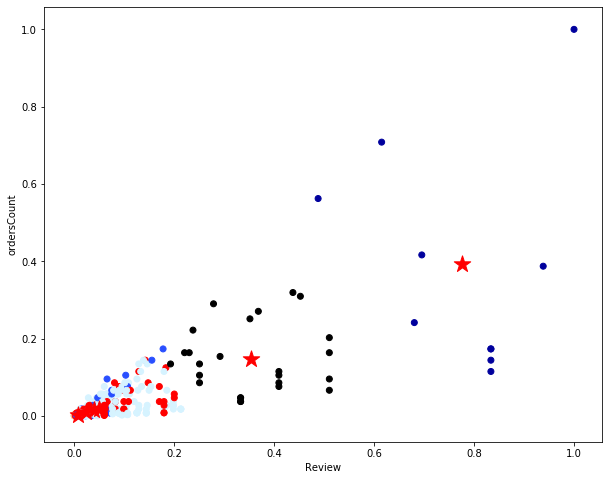

In [39]:
x=0 # Чтобы построить диаграмму в разных осях, меняйте номера столбцов
y=2 #
centroids = km.cluster_centers_
plt.figure(figsize=(10, 8))
plt.scatter(dataNorm[:,x], dataNorm[:,y], c=km.labels_, cmap='flag')
plt.scatter(centroids[:, x], centroids[:, y], marker='*', s=300,
            c='r', label='centroid')
plt.xlabel(col[x])
plt.ylabel(col[y]);
plt.show()

In [40]:
# к оригинальным данным добавляем номера кластеров
df['KMeans']=km.labels_+1
res=df.groupby('KMeans')[col].mean()
res['Количество']=df.groupby('KMeans').size().values
res

,Review,Star,ordersCount,Количество
KMeans,,,,
1,20.851562,5.000000,177.890625,128
2,3.510204,1.530612,39.795918,49
3,26.554795,4.000000,201.541096,292
4,12.072464,3.000000,128.405797,138
5,414.700000,4.700000,4050.000000,10
6,188.760000,4.320000,1532.000000,25


In [41]:
df[df['KMeans']==6] # изменяйте номер кластера, содержание которого хотите просмотреть

,id,Review,Star,Value,brandId,brandName,goodsName,isSoldOut,link,lowQuantity,...,Материал корпуса,Модель,Мощность устройства,Объем чайника,Страна бренда,Страна производитель,Цвет,sale_june,I,KMeans
2,2389982,273,4,1883,16012,Philips,Чайник Daily Collection HD4646,0,https://www.wildberries.ru/catalog/2389982/det...,0,...,пластик,HD4646,2400.0,1.5,Нидерланды,Польша,черный,200,5,6
3,2389983,273,4,1883,16012,Philips,Чайник Daily Collection HD4646,0,https://www.wildberries.ru/catalog/2389983/det...,0,...,пластик,HD4646,2400.0,1.5,Нидерланды,Польша,"белый, красный",100,5,6
4,2389984,273,4,1883,16012,Philips,Чайник Daily Collection HD4646,0,https://www.wildberries.ru/catalog/2389984/det...,0,...,пластик,HD4646,2400.0,1.5,Нидерланды,Польша,"голубой, белый",200,5,6
9,2545012,127,4,1543,599,REDMOND,Чайник Redmond RK-G161,0,https://www.wildberries.ru/catalog/2545012/det...,0,...,NaN,RK-G161,NaN,NaN,Соединенные Штаты,Китай,черный,0,2,6
11,2840346,273,4,1883,16012,Philips,Чайник Daily Collection HD4646,0,https://www.wildberries.ru/catalog/2840346/det...,0,...,пластик,HD4646,2400.0,1.5,Нидерланды,Польша,белый,200,5,6
33,3458306,134,5,1852,18571,FIRST,Чайник,0,https://www.wildberries.ru/catalog/3458306/det...,0,...,стекло,5406-2,2200.0,1.7,Австрия,Китай,белый,0,2,6
38,3595215,118,4,2063,599,REDMOND,Чайник RK-M183,0,https://www.wildberries.ru/catalog/3595215/det...,0,...,нержавеющая сталь,RK-M183,2200.0,1.7,Соединенные Штаты,Китай,серебристый,100,2,6
75,4627488,134,5,1852,18571,FIRST,Чайник,0,https://www.wildberries.ru/catalog/4627488/det...,0,...,стекло,5406-2,2200.0,1.7,Австрия,Китай,"серый, прозрачный",100,2,6
83,4943330,103,4,3390,16102,Kitfort,Чайник КТ-621,0,https://www.wildberries.ru/catalog/4943330/det...,0,...,алюминий,КТ-621,2200.0,1.7,Россия,Китай,серебристый,0,2,6
93,4951662,123,4,908,25258,GALAXY,Чайник электрический GL0223,0,https://www.wildberries.ru/catalog/4951662/det...,0,...,пластик,GL0223,900.0,1.0,Россия,Китай,"голубой, белый",0,2,6


In [42]:
df[df['KMeans']==4][['Review', 'Star', 'ordersCount', 'Value', 'brandName', 'goodsName',
       'Мощность устройства', 'Объем чайника', 'Цвет']]

,Review,Star,ordersCount,Value,brandName,goodsName,Мощность устройства,Объем чайника,Цвет
1,15,3,100,1999,Polaris,"Чайник PWK 1864CA, 1.8л. 1800Вт",1800.0,1.8,серебристый
12,7,3,200,2547,Philips,Чайник Daily Collection HD9306/02,1800.0,1.5,"серебристый, черный"
20,10,3,30,1592,MAXWELL,Чайник электрический MW-1014,2200.0,1.7,"коричневый, белый"
21,3,3,30,1971,MAXWELL,Чайник электрический MW-1055,2200.0,1.8,серебристый
24,12,3,100,3190,Vitek,Чайник электрический VT-1122,2200.0,1.7,прозрачный
...,...,...,...,...,...,...,...,...,...
623,6,3,20,960,Beon,Электрический чайник BN-3004,2000.0,2.5,белый
628,2,3,40,3996,Tefal,Чайник стеклянный Tefal Glass KI7208 2400 Вт 1...,2400.0,1.7,серебристый
635,3,3,20,976,ДОБРЫНЯ-М,Чайник 2л 2200Вт ХОХЛ,2000.0,2.0,"черный, красный, желтый"
638,2,3,20,1990,Kitfort,Чайник КТ-6106,2000.0,1.7,серебристый
